<a href="https://colab.research.google.com/github/MladenGaric/Py/blob/main/Titanik_linearna_regresija_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf  
import pandas as pd 

In [ ]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

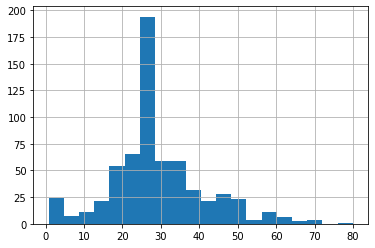

In [ ]:
dftrain.age.hist(bins=20) # vecina putnika je izmedju 20-30 godina

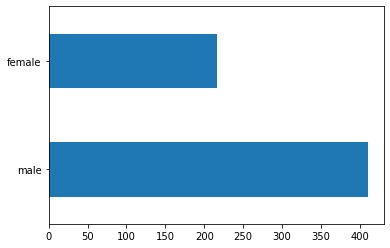

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

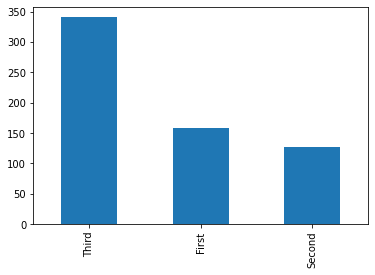

In [ ]:
dftrain['class'].value_counts().plot(kind='bar')

Text(0.5, 0, '% survive')

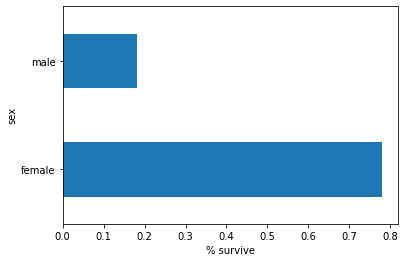

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [ ]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
# sad moramo da promenimo dataset koji imamo u object type tf.data.Dataset
# moramo da napravimo input funckiju za to, da konvertujemo 
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True, batch_size = 32):
  def input_function(): # ovde cemo da nas data set promesamo, randomizujemo
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
      ds= ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)   #ovde sad pozivamo funkciju koju smo napravili, da bismo od naseg dftrain dataseta iz pande napravili objekat tipa tf.data.Dataset
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) # isto



In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) # ovde pravimo model linearne regresije

In [ ]:
linear_est.train(train_input_fn)  # pozivamo funkciju train() i treniramo model 
result = linear_est.evaluate(eval_input_fn)  # ovde uzmiamo koeficijente naseg modela, tj statistiku kojom ocenjujemo nove podatke

clear_output()  # izbrisemo sve iz konzole sta je ranije izbacio terminal, jer ima mnogo teksta bzv
print(result['accuracy'])  # od celog rezultata, ima vise podataka, ali nas zanima samo Accuracy set

0.7537879


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[5])
print(y_eval[5])
print(result[5]['probabilities']) # ovde predvidjamo za [x] rekord u testnom datasetu sanse za prezivi (0 da nije, 1 da jeste)



sex                       female
age                         15.0
n_siblings_spouses             0
parch                          0
fare                      8.0292
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 5, dtype: object
1
[0.16254362 0.83745646]
